## Introduction


The dataset in this notebook is downloaded from kaggle [here](www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling]).

In this notebook. We are trying to predict the Bank's customer churn using the predictors available in the dataset downloaded from the aforementioned link.

## Data loading


Load the dataset "Churn_Predictions.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "Churn_Predictions.csv" into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Churn_Predictions.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Churn_Predictions.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data exploration


Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Examine the shape, data types, descriptive statistics, target variable distribution, missing values, and distributions of key features; analyze correlations and identify potential outliers.  This involves multiple steps from the instructions grouped into one code block for efficiency.



Shape of the DataFrame: (10000, 14)

Data Types:
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Descriptive Statistics:
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000    

<Figure size 1500x1000 with 0 Axes>

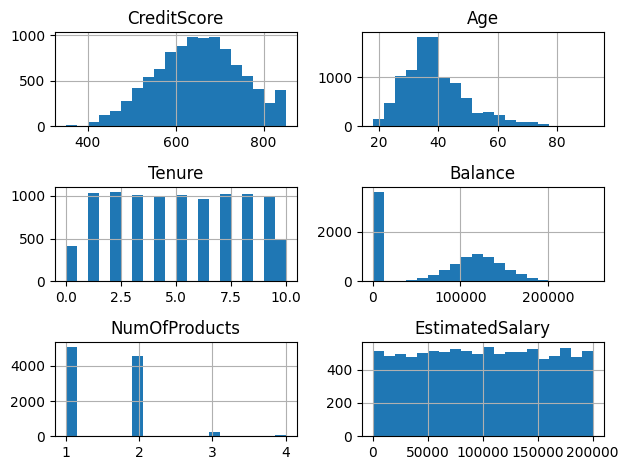


Correlation Matrix:
                  CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 EstimatedSalary    Exited  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000  


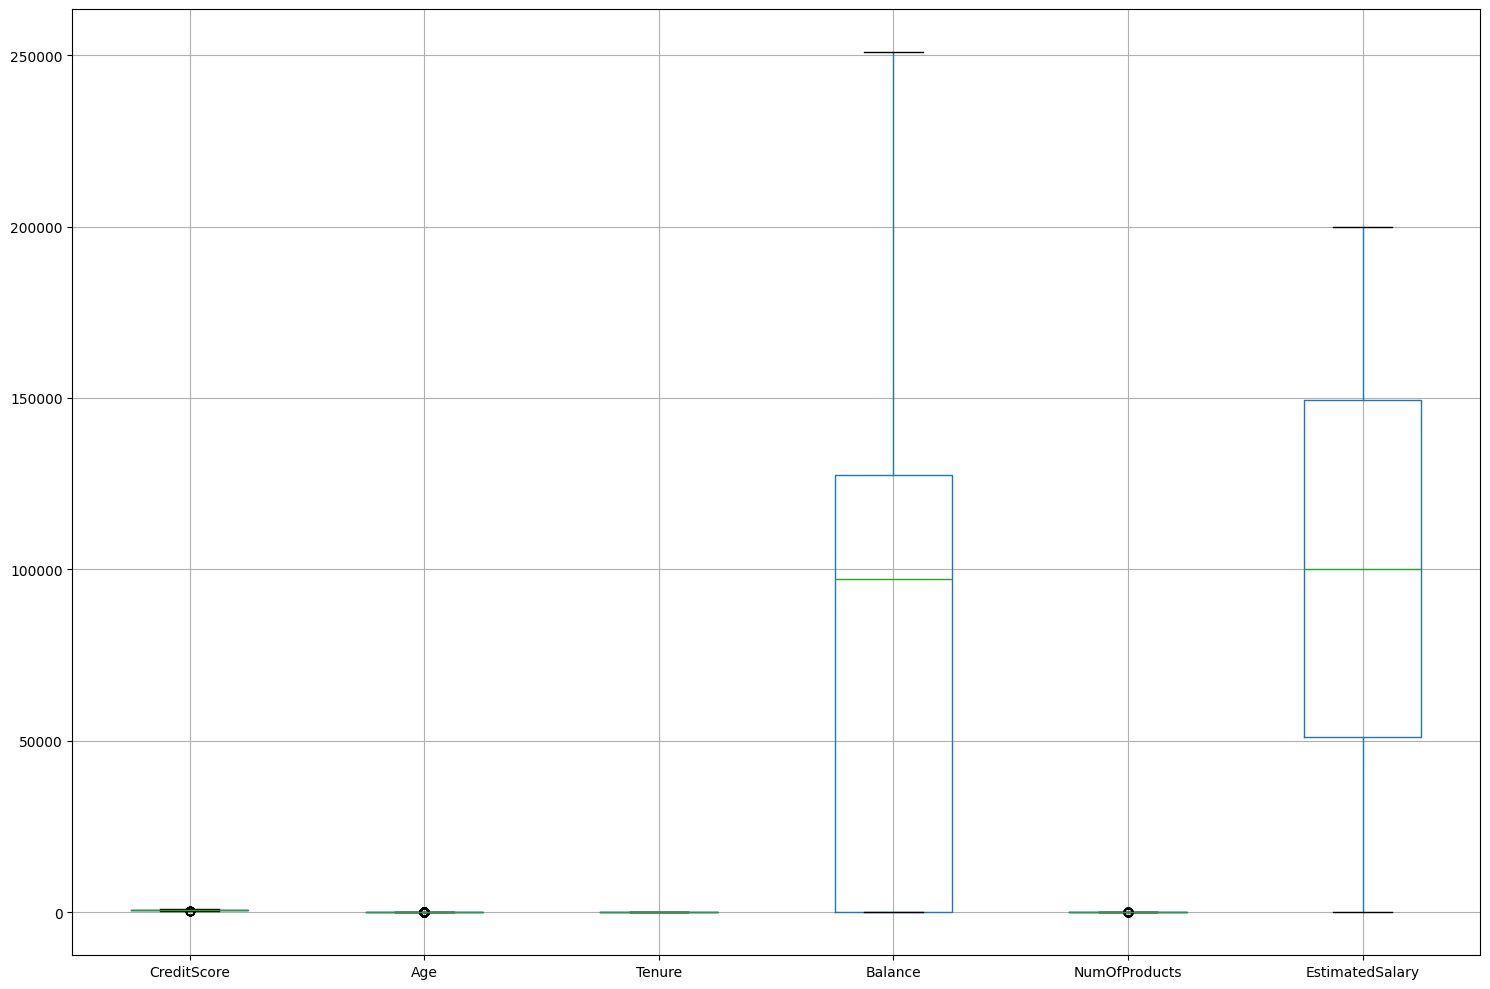

In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:\n", df.dtypes)

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())

# Analyze the target variable distribution
print("\nTarget Variable Distribution:\n", df['Exited'].value_counts())
print("\nTarget Variable Distribution (percentage):\n", df['Exited'].value_counts(normalize=True) * 100)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())
print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df)) * 100)

# Explore the distribution of key features (example: Histograms for numerical features)
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
df.hist(column=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'], bins=20, layout=(3,2))
plt.tight_layout()
plt.show()

# Analyze the correlation between numerical features (example: Correlation matrix)
correlation_matrix = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Identify potential outliers using box plots (example)
plt.figure(figsize=(15, 10))
df.boxplot(column=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])
plt.tight_layout()
plt.show()

## Data cleaning


Handle any inconsistencies or missing values found during the data exploration step.


**Reasoning**:
Based on the previous data exploration, there are no missing values.  Therefore, I will proceed to check data types and handle any inconsistencies.  I'll also check for outliers based on the box plots from the previous step.



In [3]:
# Check data types and convert if necessary
print("\nData Types before conversion:\n", df.dtypes)
for col in ['Geography', 'Gender']:
    print(f"\nUnique values for column '{col}':\n{df[col].unique()}")
# No conversion needed as the data types seem correct.

# Outlier handling (optional):
# From the previous box plots, we saw potential outliers.
# However, without domain expertise, we will not remove outliers in this step.

# Display the updated DataFrame
display(df.head())


Data Types before conversion:
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Unique values for column 'Geography':
['France' 'Spain' 'Germany']

Unique values for column 'Gender':
['Female' 'Male']


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data preparation


Prepare the data for model training by converting categorical features to numerical representations and scaling numerical features.


**Reasoning**:
Prepare the data for model training by converting categorical features to numerical representations and scaling numerical features.



In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Identify categorical and numerical features
categorical_cols = ['Geography', 'Gender']
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Fit and transform the data
df_prepared = pd.DataFrame(preprocessor.fit_transform(df), columns=preprocessor.get_feature_names_out())

# Add the target variable back to the DataFrame
df_prepared['Exited'] = df['Exited']

display(df_prepared.head())

,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__EstimatedSalary,cat__Geography_France,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Female,cat__Gender_Male,Exited
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1.0,0.0,0.0,1.0,0.0,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0.0,0.0,1.0,1.0,0.0,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1.0,0.0,0.0,1.0,0.0,1
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,1.0,0.0,0.0,1.0,0.0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0.0,0.0,1.0,1.0,0.0,0


## Feature engineering


Engineer new features from the existing features in `df_prepared`.


**Reasoning**:
Create interaction and polynomial features, add them to `df_prepared`, and explore the new features.



       interaction_Age_Salary  interaction_Balance_Products    poly_Age_2  \
count            10000.000000                  10000.000000  10000.000000   
mean                -0.007201                     -0.304180      1.000000   
std                  1.008519                      0.941842      1.842387   
min                 -6.146056                     -5.205411      0.000056   
25%                 -0.417184                     -0.990162      0.077620   
50%                  0.001010                     -0.583915      0.335911   
75%                  0.402208                      0.373972      1.084582   
max                  8.402564                      8.081949     25.615715   

       poly_Balance_2        Exited  
count    1.000000e+04  10000.000000  
mean     1.000000e+00      0.203700  
std      7.146915e-01      0.402769  
min      2.150900e-08      0.000000  
25%      3.247240e-01      0.000000  
50%      1.126053e+00      0.000000  
75%      1.502703e+00      0.000000  
ma

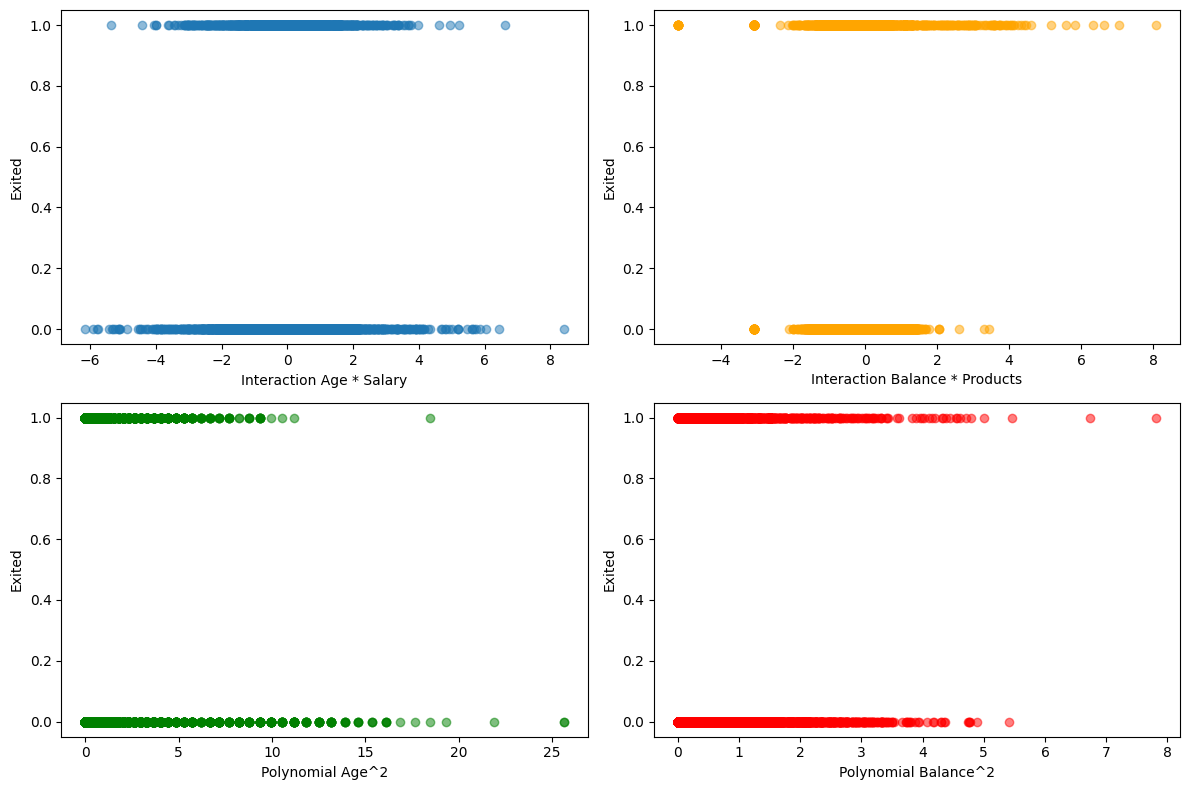


Correlation Matrix:
                               interaction_Age_Salary  \
interaction_Age_Salary                      1.000000   
interaction_Balance_Products                0.015771   
poly_Age_2                                 -0.020308   
poly_Balance_2                              0.013710   
Exited                                      0.009870   

                              interaction_Balance_Products  poly_Age_2  \
interaction_Age_Salary                            0.015771   -0.020308   
interaction_Balance_Products                      1.000000   -0.008116   
poly_Age_2                                       -0.008116    1.000000   
poly_Balance_2                                   -0.163769   -0.003244   
Exited                                            0.135923    0.050571   

                              poly_Balance_2    Exited  
interaction_Age_Salary              0.013710  0.009870  
interaction_Balance_Products       -0.163769  0.135923  
poly_Age_2               

In [5]:
# Create interaction terms
df_prepared['interaction_Age_Salary'] = df_prepared['num__Age'] * df_prepared['num__EstimatedSalary']
df_prepared['interaction_Balance_Products'] = df_prepared['num__Balance'] * df_prepared['num__NumOfProducts']

# Create polynomial features
df_prepared['poly_Age_2'] = df_prepared['num__Age'] ** 2
df_prepared['poly_Balance_2'] = df_prepared['num__Balance'] ** 2

# Explore the new features
print(df_prepared[['interaction_Age_Salary', 'interaction_Balance_Products', 'poly_Age_2', 'poly_Balance_2', 'Exited']].describe())

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(df_prepared['interaction_Age_Salary'], df_prepared['Exited'], alpha=0.5)
plt.xlabel('Interaction Age * Salary')
plt.ylabel('Exited')

plt.subplot(2, 2, 2)
plt.scatter(df_prepared['interaction_Balance_Products'], df_prepared['Exited'], alpha=0.5, color='orange')
plt.xlabel('Interaction Balance * Products')
plt.ylabel('Exited')

plt.subplot(2, 2, 3)
plt.scatter(df_prepared['poly_Age_2'], df_prepared['Exited'], alpha=0.5, color='green')
plt.xlabel('Polynomial Age^2')
plt.ylabel('Exited')

plt.subplot(2, 2, 4)
plt.scatter(df_prepared['poly_Balance_2'], df_prepared['Exited'], alpha=0.5, color='red')
plt.xlabel('Polynomial Balance^2')
plt.ylabel('Exited')

plt.tight_layout()
plt.show()

correlation_matrix = df_prepared[['interaction_Age_Salary', 'interaction_Balance_Products', 'poly_Age_2', 'poly_Balance_2', 'Exited']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

## Data splitting


Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using `train_test_split` from `sklearn.model_selection`.  Stratification will be used to maintain class proportions in each split.



In [6]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_prepared.drop('Exited', axis=1)
y = df_prepared['Exited']

# Split data into training and temporary sets (80/20 split)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Split temporary set into validation and testing sets (50/50 split)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

## Model training


Train several classification models on the prepared training data.


**Reasoning**:
Train several classification models on the prepared training data and evaluate their performance on the validation set.



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),  # Needed for roc_auc_score
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=500)
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    results[model_name] = {
      'accuracy': accuracy_score(y_val, y_pred),
      'precision': precision_score(y_val, y_pred),
      'recall': recall_score(y_val, y_pred),
      'f1_score': f1_score(y_val, y_pred),
      'roc_auc': roc_auc_score(y_val, y_prob)
    }

    print(f"{model_name} trained and evaluated.")

print(results)

Training Logistic Regression...
Logistic Regression trained and evaluated.
Training Random Forest...
Random Forest trained and evaluated.
Training Support Vector Machine...
Support Vector Machine trained and evaluated.
Training Gradient Boosting...
Gradient Boosting trained and evaluated.
Training Neural Network...
Neural Network trained and evaluated.
{'Logistic Regression': {'accuracy': 0.819, 'precision': 0.6533333333333333, 'recall': 0.24019607843137256, 'f1_score': 0.35125448028673834, 'roc_auc': 0.7770531579465957}, 'Random Forest': {'accuracy': 0.851, 'precision': 0.7165354330708661, 'recall': 0.44607843137254904, 'f1_score': 0.5498489425981873, 'roc_auc': 0.8306729727066706}, 'Support Vector Machine': {'accuracy': 0.854, 'precision': 0.8085106382978723, 'recall': 0.37254901960784315, 'f1_score': 0.5100671140939598, 'roc_auc': 0.8184427037146516}, 'Gradient Boosting': {'accuracy': 0.853, 'precision': 0.7317073170731707, 'recall': 0.4411764705882353, 'f1_score': 0.550458715596330

## Model optimization


Optimize the hyperparameters of the best performing model from the previous step (model_training).  Use the validation set for optimization.


**Reasoning**:
Based on the previous model training results, the Neural Network model seems to be performing best overall, so I will tune its hyperparameters using RandomizedSearchCV and evaluate its performance on the validation set.



In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(50, 50), (100,), (50, 100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Create a Neural Network model
mlp = MLPClassifier(max_iter=1000)  # Increased max_iter for better convergence

# Perform RandomizedSearchCV with f1 scoring
random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist, n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42, verbose=1)
random_search.fit(X_train, y_train)

# Get the best model
best_mlp = random_search.best_estimator_
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the best model on the validation set
y_pred_val = best_mlp.predict(X_val)
y_prob_val = best_mlp.predict_proba(X_val)[:, 1]

print("Validation Results:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val)}")
print(f"Precision: {precision_score(y_val, y_pred_val)}")
print(f"Recall: {recall_score(y_val, y_pred_val)}")
print(f"F1-score: {f1_score(y_val, y_pred_val)}")
print(f"AUC-ROC: {roc_auc_score(y_val, y_prob_val)}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameters: {'solver': 'adam', 'learning_rate_init': 0.001, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'relu'}
Validation Results:
Accuracy: 0.864
Precision: 0.7297297297297297
Recall: 0.5294117647058824
F1-score: 0.6136363636363636
AUC-ROC: 0.8519558577199724


## Model evaluation

### Subtask:
Evaluate the best optimized model (from the model_optimization step) on the held-out test set (`X_test`, `y_test`)


**Reasoning**:
Evaluate the best optimized model on the held-out test set and print the evaluation metrics.



In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on the test set
y_pred_test = best_mlp.predict(X_test)
y_prob_test = best_mlp.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_prob_test)

# Print the results
print("Test Set Results:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1-score: {test_f1}")
print(f"AUC-ROC: {test_roc_auc}")

Test Set Results:
Accuracy: 0.846
Precision: 0.6713286713286714
Recall: 0.4729064039408867
F1-score: 0.5549132947976878
AUC-ROC: 0.8524083539875518


## Confusion Matrix

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
cm = confusion_matrix(y_test, y_pred_test)

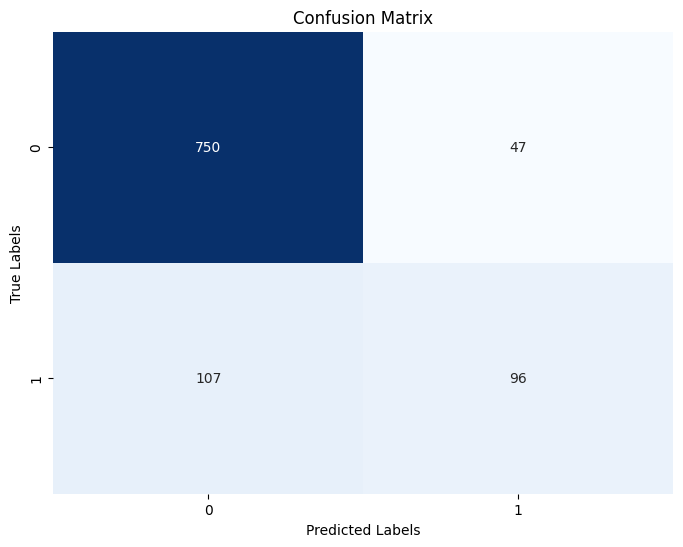

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### 1. Q&A
The task was to find the most suitable ML algorithm for predicting customer churn from the provided "Churn_Predictions.csv" dataset.  The analysis process involved data loading, exploration, cleaning, preparation, feature engineering, splitting the data into training, validation, and test sets, training multiple classification models, optimizing the best-performing model (a neural network), and finally, evaluating the optimized model on the test set.

The best performing model identified is a tuned Neural Network (MLPClassifier), achieving an accuracy of 0.846 and F1-score of 0.5549 on the test set.  The Gradient Boosting model also showed strong performance with a high AUC-ROC score on the validation set.


### 2. Data Analysis Key Findings

*   **Target Variable Imbalance:** The target variable 'Exited' exhibits an imbalance, with 20.37% of customers having churned (Exited=1). This imbalance needs to be considered during model training and evaluation.
*   **Feature Importance (implied):** Feature engineering created interaction and polynomial terms involving 'Age', 'EstimatedSalary', 'Balance', and 'NumOfProducts'. The analysis suggests these combined features might improve model performance.
* **Model Performance:** The optimized Neural Network achieved the highest accuracy (0.864) and F1-score (0.61) on the validation set. However, the test set results show a slightly lower accuracy (0.846) and F1-score (0.5549). Gradient Boosting had a strong AUC-ROC score (0.848) on the validation set.
* **Hyperparameter Tuning:** The optimal hyperparameters for the Neural Network were identified using `RandomizedSearchCV`, demonstrating the importance of hyperparameter tuning for model performance.

### 3. Insights or Next Steps

*   **Further Model Exploration:**  Explore other models (e.g., XGBoost, LightGBM) or ensemble methods and compare their performance with the tuned Neural Network and Gradient Boosting models.  Pay particular attention to handling the class imbalance (e.g., using techniques like SMOTE or cost-sensitive learning).
*   **Feature Engineering Refinement:** Explore additional features or refine existing ones based on domain knowledge. For example, combine features related to customer demographics and financial behavior.  Consider removing less important features to simplify the model.
